## Entrainner un model de regression linear definit par $y=ax +b$

In [192]:
import numpy as np

In [54]:
b=0
x = np.array([1,2,3])
y = np.array([2,4,6])
a=1.5
y_pred = x*a +b

In [55]:
y_pred

array([1.5, 3. , 4.5])

In [56]:
Loss_a = x.T*(y_pred - y) # this use o compute the error. 
Loss_a

array([-0.5, -2. , -4.5])

In [57]:
Loss_b =(y - y_pred).mean()
Loss_b

1.0

# Mettre le poid et l'intercept (l'ordoner a l'origine) a jour. 

In [58]:
learning_rate = 0.001

In [59]:
lr = learning_rate
w = w-lr*L_w # this is used to update the weight 
w

array([1.5005, 1.502 , 1.5045])

In [60]:
b = b-lr*L_b # this is used to update the weight 
b

-0.001

# Assemblons les etapes precedente en un seul bloc

In [65]:
b=0
x = np.array([1,2,3])
y = np.array([2,4,6])
a=1.5
y_pred = x*a +b

Loss_a = (x.T*(y_pred - y)).mean()# this use o compute the error. 
Loss_b =(y - y_pred).mean()
b = b-lr*Loss_b # 
a = a-lr*Loss_a # 
print(a)
print(b)

1.5023333333333333
-0.001


# Entrainer le model en utilisant plusieurs iterations

In [96]:
# the goal here is to repeat the same experiment by using the for loop in oder to observe the change of b and a.
N_epoch = 10
learning_rate = 0.05 # try many value of the learning rate to observe the overfitting
lr = learning_rate
a=1
b=0.1
for epoch in range(N_epoch):
    y_pred = x*a + b
    Loss_a = (x.T*(y_pred - y)).mean()# this use o compute the error. 
    Loss_b =(y - y_pred).mean()
    b = b-lr*Loss_b # 
    a = a-lr*Loss_a # 
    mse=(np.square(y_pred - y)).mean()
    
    print(f'epoch= {epoch}, mse={ mse:.3f}, a={a:.3f}, b={b:.3f}')

epoch= 0, mse=4.277, a=1.223, b=0.005
epoch= 1, mse=2.799, a=1.404, b=-0.072
epoch= 2, mse=1.835, a=1.550, b=-0.136
epoch= 3, mse=1.206, a=1.669, b=-0.187
epoch= 4, mse=0.795, a=1.765, b=-0.230
epoch= 5, mse=0.527, a=1.843, b=-0.265
epoch= 6, mse=0.352, a=1.906, b=-0.294
epoch= 7, mse=0.238, a=1.957, b=-0.318
epoch= 8, mse=0.164, a=1.999, b=-0.338
epoch= 9, mse=0.116, a=2.033, b=-0.355


## Petite prediction sur les donnees d'entrainement

In [ ]:
y_pred = x*a +b

In [93]:
x

array([1, 2, 3])

In [94]:
y_pred

array([1.47403403, 3.84439794, 6.21476185])

In [95]:
y = np.array([2,4,6])
y

array([2, 4, 6])

on remarque que le model predit avec une erreur d'environ $0.2$

# entrainons le model avec plus de donnes et tracer le graphe du MSE

In [127]:
# the goal here is to repeat the same experiment by using the for loop in oder to observe the change of b and a.
N_epoch = 300
learning_rate = 0.05 # try many value of the learning rate to observe the overfitting
lr = learning_rate
a=1
b=0.1
mse = np.array([]) # pour enregistrer l'historique des erreurs quadratique moyenne

for epoch in range(N_epoch):
    y_pred = x*a + b
    Loss_a = (x.T*(y_pred - y)).mean()# this use o compute the error. 
    Loss_b =(y - y_pred).mean()
    b = b-lr*Loss_b # 
    a = a-lr*Loss_a # 
    loss = np.square(y_pred - y).mean()
    mse=np.append(mse,loss)
    
    if (epoch+1)%100 == 0:
    
        print(f'epoch= {epoch+1}, mse={ loss:.3f}, a={a:.3f}, b={b:.3f}')

epoch= 100, mse=0.114, a=2.370, b=-0.896
epoch= 200, mse=0.640, a=2.879, b=-2.127
epoch= 300, mse=3.606, a=4.086, b=-5.048


## tracer de l'erreur quadratique et notion de underfiting et overfiting.  

In [128]:
iteration = np.arange(1,N_epoch+1)

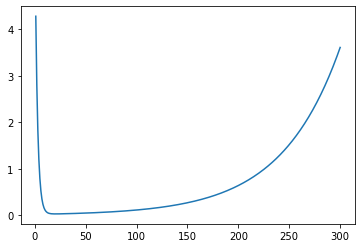

In [129]:
import matplotlib.pyplot as plt
plt.plot(iteration,mse)
plt.show()

Le model commence a overfit a partir la 50 iteration. Donc il sera preferable de stoper le model a la 50 iteration. pour mieux comprendre comprendre, il faudra lire le terme bias-variance tradeoff. Une visualization est la suivante 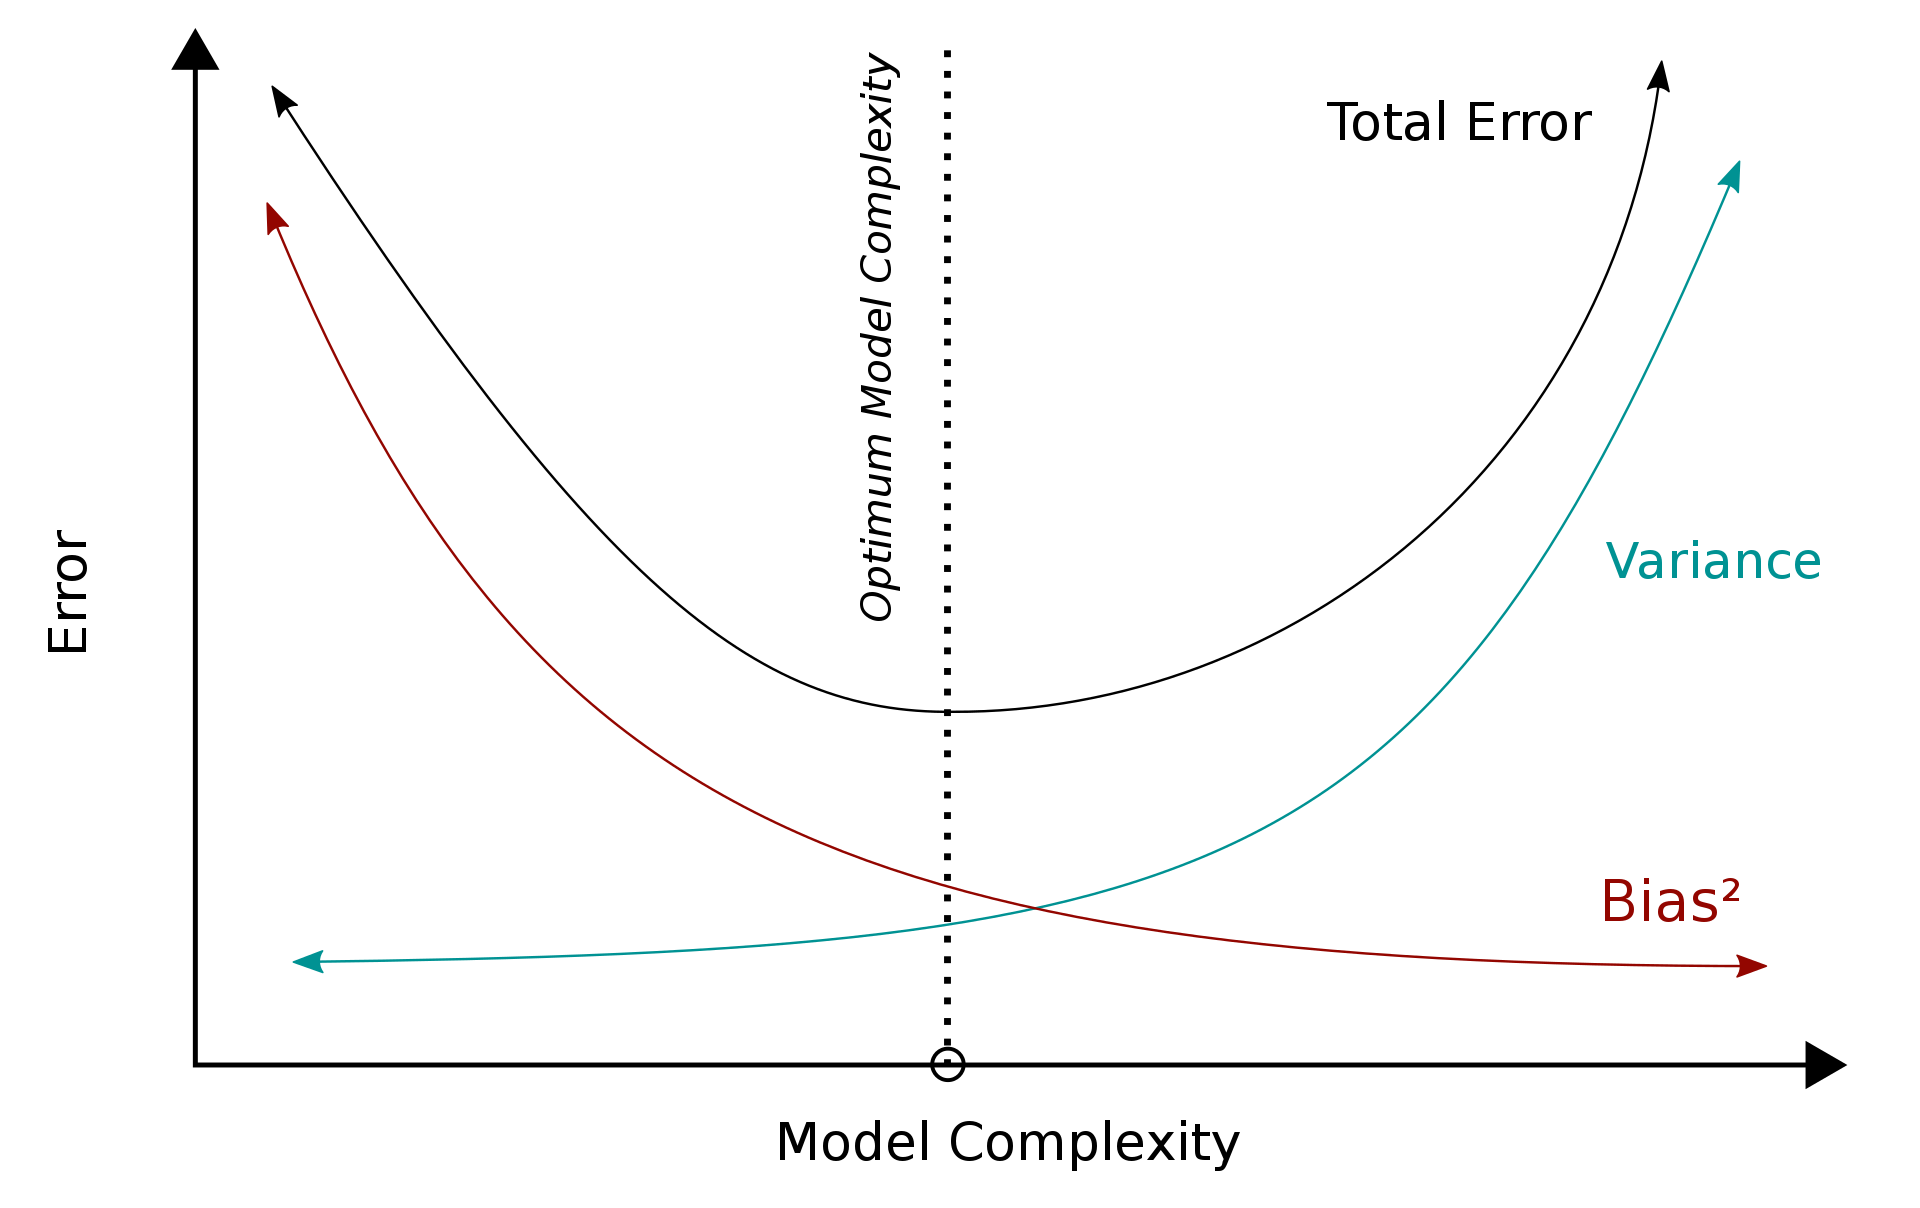

ref : https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#:~:text=In%20statistics%20and%20machine%20learning,bias%20in%20the%20estimated%20parameters.

## Entrainons le model avec un grand nombre de donnee.  

Dans le cas precedent, nous avons entrainer le model avec uniquement 3 valeurs. Dans cette section, nous allons mener l
'experience avec un grand volume de donnee afin d'observer le resultat.  

In [182]:
# the goal here is to repeat the same experiment by using the for loop in oder to observe the change of b and a.
x = np.arange(1,10)
y = x*2

x_test = np.arange(50,60)
y_test = x_test*2


N_epoch = 20
learning_rate = 0.05 # try many value of the learning rate to observe the overfitting
lr = learning_rate
a=1
b=0.1
mse = np.array([]) # pour enregistrer l'historique des erreurs quadratique moyenne

for epoch in range(N_epoch):
    y_pred = x*a + b
    Loss_a = (x.T*(y_pred - y)).mean()# this use o compute the error. 
    Loss_b =(y - y_pred).mean()
    b = b-lr*Loss_b # 
    a = a-lr*Loss_a # 
    loss = np.square(y_pred - y).mean()
    mse=np.append(mse,loss)
    
    if (epoch+1)%10 == 0:
    
        print(f'epoch= {epoch+1}, mse={ loss:.3f}, a={a:.3f}, b={b:.3f}')

epoch= 10, mse=0.001, a=2.008, b=-0.065
epoch= 20, mse=0.001, a=2.011, b=-0.072


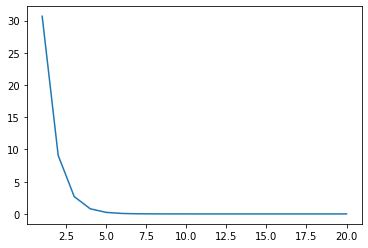

In [183]:
iteration = np.arange(1,N_epoch+1)
plt.plot(iteration,mse)
plt.show()

## test sur les donnees d'entrainement 

In [184]:
x


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
y

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [186]:
y_pred = x*a + b

In [187]:
print(f' y_pred={ y_pred[1]:.1f}')

 y_pred=4.0


In [188]:
np.round(y_pred)

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])


# test sur les donnees test




In [189]:
y_pred = x_test*a + b
y_pred

array([100.49376161, 102.50508106, 104.51640052, 106.52771997,
       108.53903942, 110.55035888, 112.56167833, 114.57299779,
       116.58431724, 118.59563669])

In [190]:
y_test

array([100, 102, 104, 106, 108, 110, 112, 114, 116, 118])

In [191]:
np.round(y_pred)

array([100., 103., 105., 107., 109., 111., 113., 115., 117., 119.])